#  This is Lab 2 executable file
This file contains the program code that is the solution to the tasks from the file [lab_2_task.txt](https://github.com/vandosik/M-M-MSA/blob/master/Lab_2/lab_2_task.txt).
## Authors
* Ivan Dubinin: [vandosik](https://github.com/vandosik)
* Alexey Grandilevskii: [zer0deck](https://github.com/zer0deck)
* Mikhail Sorokin: [Mikha1lSorokin](https://github.com/Mikha1lSorokin)

In [1]:
# libs initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit 
import seaborn as sns

In [2]:
# Dataset initialization
path_to_file = '../Datasets/GameStats.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.head(5)

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,520,30,False,1.579998,150,0.0
1,9/7/2019 2:44:46 PM,520,30,False,3.805001,100,0.0
2,9/7/2019 2:59:20 PM,520,30,False,1.783006,50,0.0
3,9/7/2019 2:59:28 PM,520,30,True,0.263020,0,0.0
4,9/7/2019 2:59:48 PM,520,30,True,3.318019,50,0.0


Date:        date and time the game was auto-played

Level:       the 3-digit number is an estimate of the difficulty from a previous run

NumBlocks:   how many blocks have to be broken to win the level

IsWin:       True if autoplay broke all the blocks, False if the ball fell past the paddle

ElapsedTime: Seconds until either won or lost (game is played at 4x speed, so multiply by 4 to get an estimate of how long a human might play it)

Score:       total score when the game was won or lost

Accuracy:    the autoplay is tuned with a randomly-chosen accuracy. Higher numbers are more likely to win;

In [3]:
# Select column

# col_names = ['Date',	'Level',	'NumBlocks',	'IsWin',	'ElapsedTime',	'Score',	'Accuracy']
col_names = list(source_df.columns)

col_name = col_names[4]

In [4]:
# Remove outliers
if True: # one way
    q_low = source_df[col_name].quantile(0.005)
    q_hi  = source_df[col_name].quantile(0.995)

    source_df = source_df[(source_df[col_name] < q_hi) & (source_df[col_name] > q_low)]
else: # other way
    source_df[(np.abs(scipy.stats.zscore(source_df)) < 3).all(axis=1)]

>The code above is identical for all labs and is used to initialize the dataset.

## Exercise №1

No handles with labels found to put in legend.


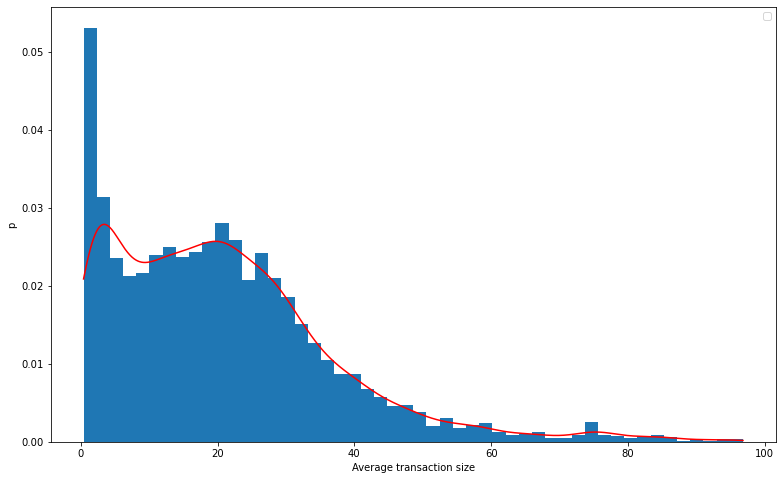

In [5]:
#Plotting a histogram and kernel density estimate
plt.figure(figsize=(13, 8))

kernel = scipy.stats.gaussian_kde(source_df[col_name])

min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
x = np.linspace(min_amount, max_amount, len(source_df)) # by defaul 50 items
kde_values = kernel(x)

# sns.histplot(source_df[col_name], kde=False, stat="density", label=f'Average transaction size in rubles')
# Draw unnormed histogramm
hist_data = plt.hist(source_df[col_name], density=True, bins=50)

# print(hist_vals)
plt.plot(x, kde_values, color="r")

plt.ylabel('p')
plt.xlabel('Average transaction size')

plt.legend()
plt.show()

## Exercise №2

In [ ]:
# Calculating multivariate mathematical expectation and variance
var = source_df[col_name].var()